<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import librosa
import numpy as np
from librosa.core import resample, load
from librosa.util import fix_length
from librosa import feature
from pandas import read_csv
from pandas import DataFrame
from tqdm import tqdm
from tqdm.notebook import tqdm as nb_tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = read_csv('data.csv', index_col=0)

In [3]:
data

,path,class_Snare,class_Tom,class_Cymbal,class_Hat,class_Kick,class_Conga,class_Cowbell,class_Rimshot,class_Clap,class_Shaken
17422,./Samples/wavegan-drums/valid/Snare_00328.wav,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
871,./Samples/MDLib2.2/Sorted/Snare SNoff/Rim/DI_S...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3919,./Samples/MDLib2.2/Sorted/Snare/Buzz/DI_Snare_...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1767,./Samples/MDLib2.2/Sorted/Snare SNoff/Cross St...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4734,./Samples/MDLib2.2/Sorted/Snare/Rim/ST_Snare_R...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20777,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20778,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20779,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20853,./Samples/musicradar-essential-drumkit-samples...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
features = data[['path']]

In [5]:
SR = 22050
soundtestfile = data.iloc[0, 0]
soundtest, _ = load(soundtestfile, sr=SR)
soundtest = fix_length(soundtest, 1024*(SR//1024))

In [6]:
soundtest.shape

(21504,)

In [7]:
feature.spectral_centroid(soundtest, sr=SR)

array([[2498.64027386, 2668.05249498, 3226.62612378, 3506.60782834,
        3611.77019435, 3696.25322407, 3681.22868861, 3578.20663438,
        3381.43896388, 3405.92776864, 1975.09809711, 2387.19141709,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [8]:
feature.spectral_bandwidth(soundtest, sr=SR)

array([[2095.27966786, 2155.00394083, 2359.6178961 , 2363.84648902,
        2329.96480685, 2313.37764304, 2368.80194175, 2383.79308282,
        2292.94834123, 2329.19224935, 2436.33482483, 2486.29715131,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [9]:
feature.spectral_contrast(soundtest, sr=SR)

array([[19.57932274,  9.29802939, 11.56099848, 10.58178102, 11.62885303,
        18.39612649, 22.00584546,  9.95418136, 14.31314536, 18.80369272,
        20.87483443,  8.93267348, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243],
       [ 9.75288565, 11.40658873, 15.85132659, 22.69182971, 13.0595605 ,
        10.2167721 , 14.82218537, 17.891949  , 11.90638739,  6.6398112 ,
        11.12543247,  4.2228204 , 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
        12.47081243, 12.47081243, 12.47081243, 12.47081243, 12.47081243,
   

In [10]:
feature.spectral_flatness(soundtest)

array([[3.8431119e-04, 4.6066521e-04, 4.2979608e-04, 5.1982427e-04,
        6.3475961e-04, 6.4364268e-04, 5.9745804e-04, 7.0472655e-04,
        1.4880927e-03, 2.5339474e-03, 4.0272405e-04, 1.0689297e-02,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00, 1.0000007e+00,
        1.0000007e+00, 1.0000007e+00, 1.0000007e+00]], dtype=float32)

In [11]:
feature.spectral_rolloff(soundtest, sr=SR)

array([[5189.50195312, 5501.73339844, 6319.99511719, 6427.66113281,
        6449.19433594, 6513.79394531, 6610.69335938, 6589.16015625,
        6298.46191406, 6363.06152344, 5447.90039062, 5781.66503906,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ]])

In [12]:
feature.poly_features(soundtest, sr=SR)

array([[-5.25797485e-04, -5.49110434e-04, -3.65339766e-04,
        -3.40923909e-04, -3.54714924e-04, -3.16105768e-04,
        -2.70815886e-04, -1.90553789e-04, -7.86620288e-05,
        -1.29130423e-05, -8.69894234e-07, -6.67786603e-08,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.66905196e+00,  4.98619993e+00,  3.63599965e+00,
         3.60428002e+00,  3.84937673e+00,  3.50889995e+00,
         2.99374852e+00,  2.05

In [13]:
feature.tonnetz(soundtest, sr=SR)

array([[ 1.09319446e-02, -1.07388252e-02,  1.29526601e-02,
         1.77854876e-02,  3.86416480e-02,  3.60004604e-04,
         1.83445857e-02, -5.26747229e-03, -5.34543420e-03,
        -1.26329297e-02, -1.45599549e-02, -3.92604196e-02,
        -2.82208278e-02,  2.28255664e-02, -6.06664197e-03,
        -9.99726521e-02, -2.09402092e-02,  1.08524926e-01,
         1.99108889e-02,  1.82174584e-01, -8.04317350e-02,
        -1.24200113e-01,  2.59117644e-01, -1.45588387e-02,
        -1.30952749e-02,  1.38578518e-02,  6.55223273e-02,
         5.39503090e-02,  6.44703151e-02,  6.19634081e-02,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-6.42688159e-03,  2.44412321e-02,  1.71808122e-03,
         1.47494003e-02, -1.13676675e-02, -3.29638416e-04,
         3.76978200e-02,  9.81

In [14]:
feature.zero_crossing_rate(soundtest)

array([[0.07666016, 0.15429688, 0.22802734, 0.28857422, 0.32666016,
        0.32861328, 0.33251953, 0.24511719, 0.18701172, 0.10839844,
        0.03076172, 0.02880859, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ]])

In [15]:
rms = feature.rms(soundtest)[0]
rms_norm = rms/rms[0]
decay = feature.delta(rms_norm)

In [16]:
rms_centroid = (rms * np.arange(len(rms))).sum() / (np.arange(len(rms)).sum())

In [17]:
rms_centroid

0.0031385345427086837

In [18]:
index = data.index
files = data['path']
features = DataFrame()

In [19]:
SR=22050
#data = data.sample(frac=0.2)
for index, file in tqdm(zip(data.index, data['path']), total=len(data.index), position=0, leave=True):
    sound, _ = load(file, sr=SR)
    sound = fix_length(sound, 1024*(SR//1024))
    
    rms = feature.rms(sound)[0]
    rms_centroid = (rms * np.arange(len(rms))).sum() / (np.arange(len(rms)).sum())
    features.loc[index, 'rms_centroid'] = rms_centroid
    
    zero_cr = feature.zero_crossing_rate(sound)[0]
    columns = ['zero_cr_' + str(x) for x in range(zero_cr.shape[0])]
    for col, value in zip(columns, zero_cr):
        features.loc[index, col] = value
        
    spect_cent = feature.spectral_centroid(sound, sr=SR)[0]
    columns = ['spect_cent_' + str(x) for x in range(spect_cent.shape[0])]
    for col, value in zip(columns, spect_cent):
        features.loc[index, col] = value
        
    spect_ro = feature.spectral_rolloff(sound, sr=SR)[0]
    columns = ['spect_ro_' + str(x) for x in range(spect_ro.shape[0])]
    for col, value in zip(columns, spect_ro):
        features.loc[index, col] = value
        
    rms = feature.rms(sound)[0]
    columns = ['rms_' + str(x) for x in range(rms.shape[0])]
    for col, value in zip(columns, rms):
        #features.loc[index, col] = value
        features.loc[index, 'norm_'+ col] = value/rms[0]
    
        
    spect_cont = feature.spectral_contrast(sound, sr=SR)
    for i in range (spect_cont.shape[0]):
        for j in range (spect_cont.shape[1]):
            col = 'spec_cont_' + str(i) + '_' + str(j)
            features.loc[index, col] = spect_cont[i][j]

100%|██████████| 1704/1704 [03:42<00:00,  7.65it/s]


In [20]:
features.to_csv('features.csv')

In [21]:
Y = data.loc[features.index,[c for c in data.columns if c.startswith('class_')]]
#Y = data.fillna(0)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(test_size=0.2)
train_index, test_index = next(sss.split(features, Y))
train_X = features.iloc[train_index,:]
valid_X = features.iloc[test_index,:]
train_Y = Y.iloc[train_index,:]
valid_Y = Y.iloc[test_index,:]

#train_X, valid_X , train_Y, valid_Y = train_test_split(features, data, test_size=0.8)

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(criterion='gini', class_weight= 'balanced')
#clf = DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)

In [121]:
valid_Y_pred =  clf.predict_proba(valid_X)
pred= [ valid_Y_pred[i][j][1] for j in range(len(valid_Y_pred[0])) for i in range(Y.shape[1])  ]
pred = np.asarray(pred).reshape(-1, Y.shape[1])

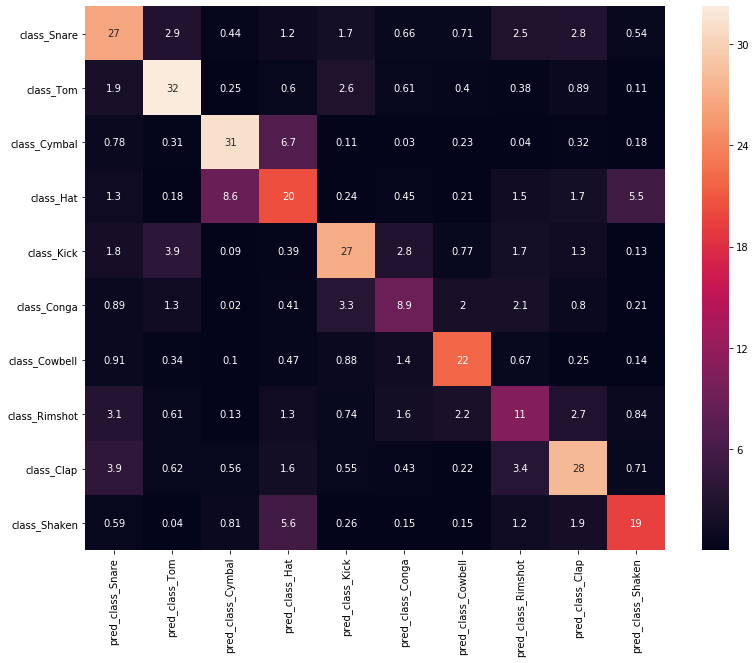

In [122]:
matrix = np.zeros([Y.shape[1],Y.shape[1]], dtype = float)
for probas, y in zip(pred, valid_Y.values):
    y = y.argmax()
    matrix[y] += probas
matrix_df = DataFrame(matrix, index=valid_Y.columns, columns='pred_'+valid_Y.columns)
plt.figure(figsize = (13,10))
sns.heatmap(matrix_df, annot=True);

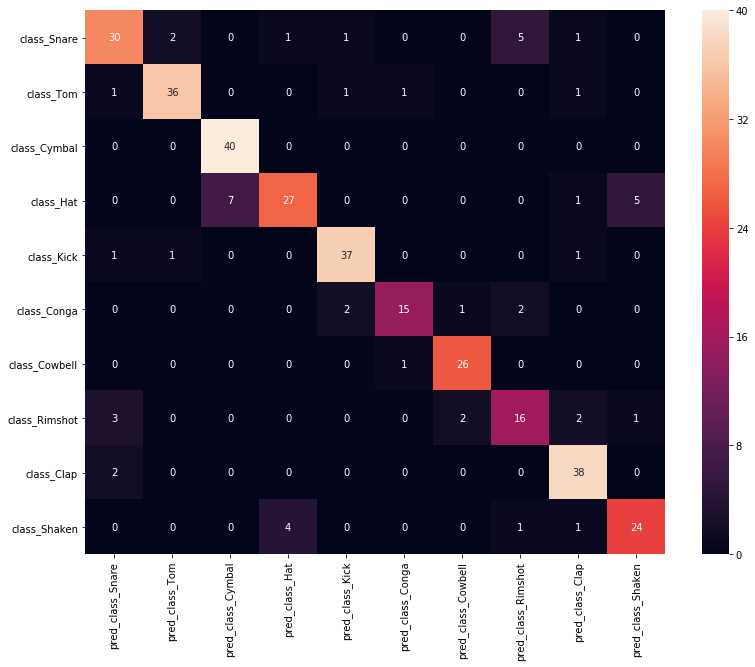

In [123]:
valid_Y_class = valid_Y.values.argmax(axis=1)
valid_Y_pred_class = pred.argmax(axis=1)
matrix = confusion_matrix(valid_Y_class, valid_Y_pred_class)
matrix_df = DataFrame(matrix, index=valid_Y.columns, columns='pred_'+valid_Y.columns)
plt.figure(figsize = (13,10))
sns.heatmap(matrix_df, annot=True);

In [124]:
print(classification_report(valid_Y_class, valid_Y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        40
           1       0.92      0.90      0.91        40
           2       0.85      1.00      0.92        40
           3       0.84      0.68      0.75        40
           4       0.90      0.93      0.91        40
           5       0.88      0.75      0.81        20
           6       0.90      0.96      0.93        27
           7       0.67      0.67      0.67        24
           8       0.84      0.95      0.89        40
           9       0.80      0.80      0.80        30

    accuracy                           0.85       341
   macro avg       0.84      0.84      0.84       341
weighted avg       0.85      0.85      0.84       341



In [125]:
valid_Y.values[0].argmax()

4

[]

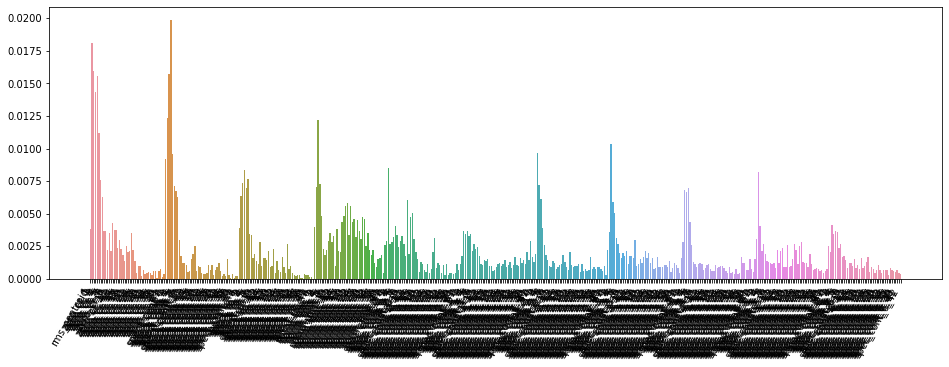

In [126]:
len(clf.feature_importances_) , len(features.columns)
bars = DataFrame(data=[clf.feature_importances_], columns = features.columns, index = ['score'])
plt.figure(figsize = (16,5))
chart = sns.barplot(data=bars)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.plot()

[]

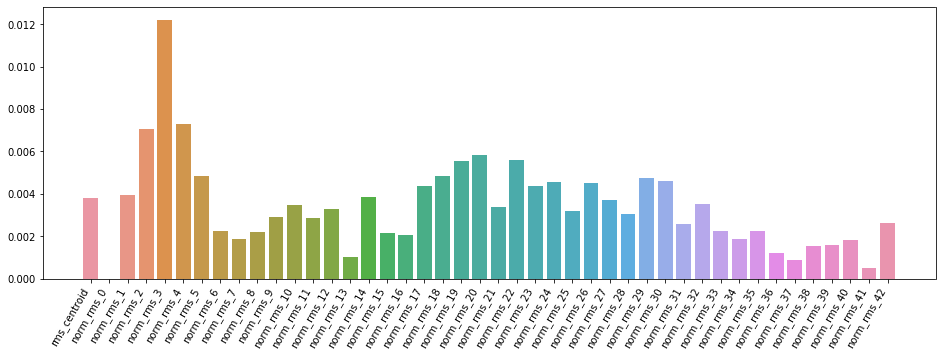

In [127]:
bars = DataFrame(data=[clf.feature_importances_], columns = features.columns, index = ['score'])
cols = [c for c in features.columns if c.startswith('rms_') or c.startswith('norm_rms_') ]
bars = bars[cols]
plt.figure(figsize = (16,5))
chart = sns.barplot(data=bars)
chart.set_xticklabels(chart.get_xticklabels(), rotation=60, horizontalalignment='right')
plt.plot()

In [128]:
# from sklearn.svm import SVC
# svc = SVC(decision_function_shape='ovr')
# svc.fit(train_X, train_Y.values.argmax(axis=1))
# valid_Y_pred =  svc.predict(valid_X)
# matrix = confusion_matrix(valid_Y.values.argmax(axis=1), valid_Y_pred)
# matrix_df = DataFrame(matrix,Y.columns index=valid_Y.columns, columns=valid_Y.columns)
# plt.figure(figsize = (15,10))
# sn.heatmap(matrix_df, annot=True)

In [129]:
features

,rms_centroid,zero_cr_0,zero_cr_1,zero_cr_2,zero_cr_3,zero_cr_4,zero_cr_5,zero_cr_6,zero_cr_7,zero_cr_8,...,spec_cont_6_33,spec_cont_6_34,spec_cont_6_35,spec_cont_6_36,spec_cont_6_37,spec_cont_6_38,spec_cont_6_39,spec_cont_6_40,spec_cont_6_41,spec_cont_6_42
17422,0.003139,0.076660,0.154297,0.228027,0.288574,0.326660,0.328613,0.332520,0.245117,0.187012,...,12.470812,12.470812,12.470812,12.470812,12.470812,12.470812,12.470812,12.470812,12.470812,12.470812
871,0.000038,0.109375,0.130859,0.146973,0.079590,0.079590,0.079102,0.089355,0.091309,0.091309,...,19.994826,19.994826,19.994826,19.994826,19.994826,19.994826,19.994826,19.994826,19.994826,19.994826
3919,0.000686,0.044922,0.061035,0.114746,0.160156,0.203613,0.220215,0.203613,0.162598,0.137695,...,20.874516,18.582983,14.719808,16.931977,16.931977,16.931977,16.931977,16.931977,16.931977,16.931977
1767,0.000016,0.100098,0.129883,0.148926,0.097168,0.089355,0.081055,0.083008,0.086914,0.088379,...,26.505635,25.796007,27.670089,28.103431,28.008058,27.112993,25.436447,27.942755,20.305885,25.543207
4734,0.000468,0.075195,0.135254,0.177734,0.182129,0.184570,0.163086,0.152344,0.147461,0.154785,...,28.338587,27.787136,27.633174,22.438654,19.734330,17.572551,9.699721,9.699721,9.699721,9.699721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20777,0.000870,0.301270,0.437500,0.579102,0.574707,0.522461,0.503418,0.480469,0.416016,0.364258,...,15.597893,15.597893,15.597893,15.597893,15.597893,15.597893,15.597893,15.597893,15.597893,15.597893
20778,0.002271,0.231445,0.375977,0.526367,0.571777,0.557129,0.535156,0.508301,0.471680,0.457031,...,14.772584,14.772584,14.772584,14.772584,14.772584,14.772584,14.772584,14.772584,14.772584,14.772584
20779,0.010282,0.219727,0.338379,0.458496,0.472168,0.485352,0.475098,0.469727,0.453613,0.456055,...,15.659705,15.659705,15.659705,15.659705,15.659705,15.659705,15.659705,15.659705,15.659705,15.659705
20853,0.002322,0.290039,0.438965,0.589355,0.601562,0.604980,0.603516,0.598633,0.591797,0.572266,...,20.528557,20.528557,20.528557,20.528557,20.528557,20.528557,20.528557,20.528557,20.528557,20.528557
